# Building a Chatbot with LangGraph

# Setup

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

## Openai
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")


# Nvidia
os.environ["NVIDIA_API_KEY"] = os.getenv("NVIDIA_API_KEY")

## langsmith tracking
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")

## Huggingface
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")

## Neo4j
os.environ["NEO4J_URI"] = os.getenv("NEO4J_URI")
os.environ["NEO4J_USERNAME"] = os.getenv("NEO4J_USERNAME")
os.environ["NEO4J_PASSWORD"] = os.getenv("NEO4J_PASSWORD")

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Start Building

In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    '''
    Messages have the type -List- 
    The add_messeges function in the annotation defines how ths state key should be updated
    (In this case, it appends the new messages to the existing list, rather than overwriting it)
    '''
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [5]:
graph_builder

In [6]:
def chatbot(state:State):
    return{"messages":llm.invoke(state["messages"])}

In [7]:
graph_builder.add_node("chatbot", chatbot)

In [8]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [9]:
graph_compiled = graph_builder.compile()

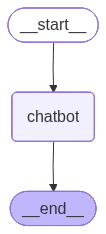

In [10]:
from IPython.display import display, Image
try:
    display(Image(graph_compiled.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [13]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit", "bye", "goodbye"]:
        print("Chatbot: Goodbye!")
        break
    for event in graph_compiled.stream({'messages': ("user",user_input)}):
        print(event.values())
        for value in event.values():
            print("User: ", value['messages'])
            print("Assistant: ", value['messages'].content)


dict_values([{'messages': AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 7, 'total_tokens': 16, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CenCEmdhe1bx1lv7pmKOpz8XEUu0x', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--e3a084e3-1594-4039-96a3-706f79435c8a-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}])
User:  content='Hello! How can I assist you today?' additional_kwargs={'refusal': None} response_metadata={'to

KeyboardInterrupt: Interrupted by user